##### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# always scale down the variables when the model is distance based

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

import warnings;
warnings.filterwarnings('ignore');

##### Importing Dataset

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset

#Age and estimatedsalary , they have different ranges
#We convert the values of age and estimatedsalary within the range of 0 to 1
# once these values are converted in same range, it is easy to plot them
# this is necessary for the models which are based on distance of values


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


##### Extracting  Variables

In [4]:
X = dataset.iloc[:,[2,3]].values    #Features / predictors
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [5]:
Y = dataset.iloc[:,4].values   #Target variable
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

##### Train Test Split

In [6]:
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=32)

In [7]:
x_test.shape

(134, 2)

##### Feature Scaling

In [8]:
#Scaling the independent variables

standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)   #fit generates the parameters, transform applies 
x_test = standard_Scaler.transform(x_test)

#fitted only on the train dataset
#transformed both train and test based on it

##### Instantiating and fitting the model to training Dataset

In [9]:
log_reg=LogisticRegression()   #Instantiation
log_reg.fit(X_train,y_train)    #training the model


LogisticRegression()

##### Prediction for Test Dataset

In [10]:
y_pred=log_reg.predict(x_test)
y_pred   #Predicted y test values


array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0])

In [11]:
y_test  #actual y test values


array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0])

##### Confusion Matrix

In [12]:
conf = confusion_matrix(y_test, y_pred)   #y_pred = log_reg.predict(x_test)
conf


array([[74,  7],
       [13, 40]])

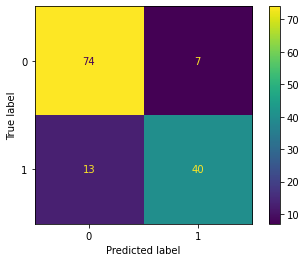

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()
plt.show()

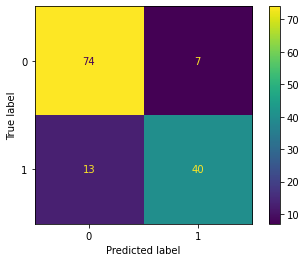

In [13]:
# the confusion matrix shows the same format everytime: (TN , FP, FN , TP) with actuals being the rows and predicted being the columns

conf_matrix = plot_confusion_matrix(log_reg,x_test,y_test)
conf_matrix


In [30]:
import sklearn
print(sklearn.__version__)

1.0.2


##### Accuracy, Precision, Recall

In [14]:
print("Accuracy: ", accuracy_score(y_test,y_pred))   #  (TP + TN )/ Total  = (74+40)/134 = 114/134


Accuracy:  0.8507462686567164


In [15]:
print("Precision: ", precision_score(y_test,y_pred))    #(TP / Total predicted positive) = 40/ (40+7) = 0.85


Precision:  0.851063829787234


In [16]:
print("Recall: ", recall_score(y_test,y_pred))      #(TP / Total actual positves)


Recall:  0.7547169811320755


In [17]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88        81
           1       0.85      0.75      0.80        53

    accuracy                           0.85       134
   macro avg       0.85      0.83      0.84       134
weighted avg       0.85      0.85      0.85       134



##### ROC and AUC

In [18]:
y_pred=log_reg.predict(x_test)
y_pred


array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0])

In [19]:
y_pred_proba = log_reg.predict_proba(x_test)
print(y_pred_proba)

# print(y_pred_proba[::,1])


# d_b = 0.7
# y_pred = [1 if i>d_b else 0 for i in y_pred_proba[:,1]]

[[0.01016366 0.98983634]
 [0.97013083 0.02986917]
 [0.93360052 0.06639948]
 [0.06840191 0.93159809]
 [0.04854055 0.95145945]
 [0.6769741  0.3230259 ]
 [0.95829933 0.04170067]
 [0.13195169 0.86804831]
 [0.11859357 0.88140643]
 [0.96067008 0.03932992]
 [0.65779746 0.34220254]
 [0.99146972 0.00853028]
 [0.08630966 0.91369034]
 [0.99382655 0.00617345]
 [0.99217162 0.00782838]
 [0.71100361 0.28899639]
 [0.97604078 0.02395922]
 [0.34882082 0.65117918]
 [0.99374865 0.00625135]
 [0.02232072 0.97767928]
 [0.35409727 0.64590273]
 [0.97720436 0.02279564]
 [0.03492051 0.96507949]
 [0.11413448 0.88586552]
 [0.57995133 0.42004867]
 [0.46302971 0.53697029]
 [0.9488691  0.0511309 ]
 [0.93281404 0.06718596]
 [0.14437257 0.85562743]
 [0.5075021  0.4924979 ]
 [0.06384701 0.93615299]
 [0.27178909 0.72821091]
 [0.99063519 0.00936481]
 [0.07359742 0.92640258]
 [0.69936466 0.30063534]
 [0.61119807 0.38880193]
 [0.98860368 0.01139632]
 [0.04646878 0.95353122]
 [0.92803925 0.07196075]
 [0.96503506 0.03496494]


In [20]:
y_pred_proba = y_pred_proba[::,1]
y_pred_proba


array([0.98983634, 0.02986917, 0.06639948, 0.93159809, 0.95145945,
       0.3230259 , 0.04170067, 0.86804831, 0.88140643, 0.03932992,
       0.34220254, 0.00853028, 0.91369034, 0.00617345, 0.00782838,
       0.28899639, 0.02395922, 0.65117918, 0.00625135, 0.97767928,
       0.64590273, 0.02279564, 0.96507949, 0.88586552, 0.42004867,
       0.53697029, 0.0511309 , 0.06718596, 0.85562743, 0.4924979 ,
       0.93615299, 0.72821091, 0.00936481, 0.92640258, 0.30063534,
       0.38880193, 0.01139632, 0.95353122, 0.07196075, 0.03496494,
       0.46838922, 0.0592154 , 0.76472603, 0.00840121, 0.05671517,
       0.95306987, 0.97989803, 0.02012794, 0.56466815, 0.0287822 ,
       0.08559898, 0.53632607, 0.0241377 , 0.11659706, 0.13534547,
       0.00431979, 0.94403464, 0.00296072, 0.90400672, 0.2255508 ,
       0.00359007, 0.32469104, 0.0077297 , 0.86361224, 0.86240694,
       0.08401643, 0.49379306, 0.89165586, 0.0094826 , 0.73617399,
       0.18308504, 0.03539894, 0.86569523, 0.92743281, 0.67446

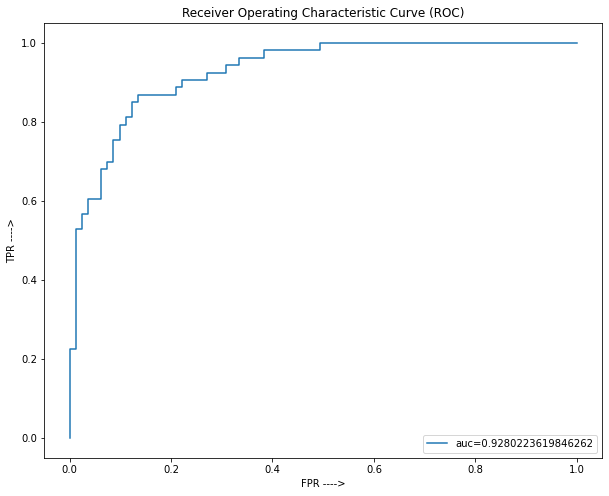

In [26]:
# metrics.roc_curve returns three outputs: fpr, tpr and different thresholds
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)   #y_pred (.75, .95)

#metrics.roc_auc_score directly returns the auc for y_actual and corresponding prob values of success for each row
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotting the AUC curve
plt.figure(figsize=(10,8))
# plt.plot(fpr,tpr,label="ROC")
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [23]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)     #returns the single auc value
auc


0.9280223619846262

In [24]:
df = pd.DataFrame()
df['TPR'] = tpr
df['FPR'] = fpr
df['Threshold']= threshold
df


,TPR,FPR,Threshold
0,0.000000,0.000000,1.989836
1,0.018868,0.000000,0.989836
2,0.226415,0.000000,0.944035
3,0.226415,0.012346,0.936153
4,0.528302,0.012346,0.855627
5,0.528302,0.024691,0.808997
6,0.566038,0.024691,0.745923
7,0.566038,0.037037,0.736174
8,0.603774,0.037037,0.709710
9,0.603774,0.061728,0.674461


In [25]:
df.to_excel("detailed_analysis_fpr_tpr.xlsx")
